In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# 1. Load the Data
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

In [3]:
print("\nDataset Preview:")
print(X.head())

# 2. Basic EDA
print("\nData Info:")
print(X.info())

print("\nClass Distribution:")
print(y.value_counts())


Dataset Preview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None

Class Distribution:
species
0    50
1    50
2    50
Name: count, dtype: int6

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
# 4. Bagging - Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [7]:
# 5. Boosting - AdaBoost
# Corrected AdaBoost initialization
ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50, random_state=42
)

ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

In [8]:
# 6. Model Evaluation

# Random Forest (Bagging)
print("\nRandom Forest (Bagging) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest (Bagging) Results:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



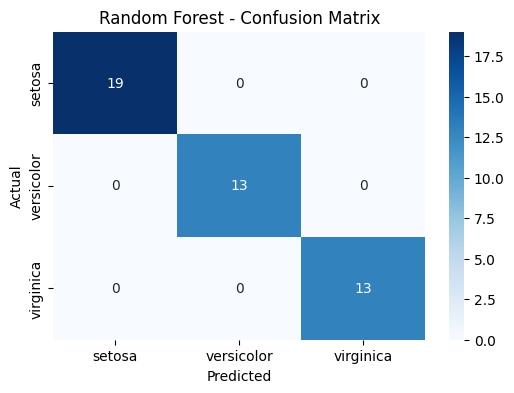

In [9]:
# Confusion Matrix - Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [10]:
# AdaBoost (Boosting)
print("\nAdaBoost (Boosting) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))


AdaBoost (Boosting) Results:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



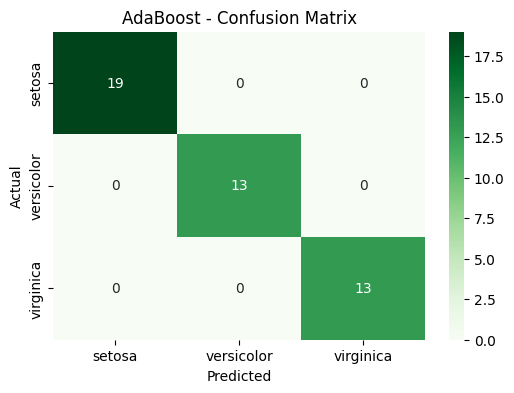

In [11]:
# Confusion Matrix - AdaBoost
cm_ada = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(6,4))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap="Greens", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("AdaBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [12]:
# 7. Conclusion
print("\nConclusion:")
print(f"Random Forest achieved {accuracy_score(y_test, y_pred_rf) * 100:.2f}% accuracy.")
print(f"AdaBoost achieved {accuracy_score(y_test, y_pred_ada) * 100:.2f}% accuracy.")

if accuracy_score(y_test, y_pred_rf) > accuracy_score(y_test, y_pred_ada):
    print("Bagging (Random Forest) performed slightly better on the Iris dataset.")
else:
    print("Boosting (AdaBoost) performed slightly better on the Iris dataset.")


Conclusion:
Random Forest achieved 100.00% accuracy.
AdaBoost achieved 100.00% accuracy.
Boosting (AdaBoost) performed slightly better on the Iris dataset.
